# Predective Model with Linear regression

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

**Load the California Housing dataset**

In [11]:
housing = fetch_california_housing()

In [17]:
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [21]:
df['MedHouseVal'] = housing.target 

**Feature Engineering**

In [25]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']  # Selected features
X = df[features]
y = df['MedHouseVal']

**Feature Scaling**

In [28]:
scaler = StandardScaler()

In [30]:
X_scaled = scaler.fit_transform(X)

In [32]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [34]:
X_poly = poly.fit_transform(X_scaled)

**Split the dataset into training and testing sets**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

**Regression Hyperparameter Tuning**

In [40]:
ridge = Ridge()
ridge_params = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0, 20.0]}

In [42]:
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0, 20.0]},
             scoring='neg_mean_squared_error')

In [44]:
best_ridge = ridge_grid.best_estimator_
ridge_pred = best_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [46]:
print(f"Best Ridge Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Ridge Regression MSE: {ridge_mse:.2f}")
print(f"Ridge Regression R2: {ridge_r2:.2f}")

Best Ridge Alpha: 20.0
Ridge Regression MSE: 0.62
Ridge Regression R2: 0.52


**Lasso Regression Hyperparameter Tuning**

In [57]:
lasso = Lasso(max_iter=5000)

In [59]:
lasso_params = {'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 5.0]}

In [61]:
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')

In [63]:
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=5000),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 5.0]},
             scoring='neg_mean_squared_error')

In [65]:
best_lasso = lasso_grid.best_estimator_
lasso_pred = best_lasso.predict(X_test)

In [67]:
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [69]:
print(f"Best Lasso Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Lasso Regression MSE: {lasso_mse:.2f}")
print(f"Lasso Regression R2: {lasso_r2:.2f}")

Best Lasso Alpha: 0.05
Lasso Regression MSE: 0.66
Lasso Regression R2: 0.50


# Visualize model performance

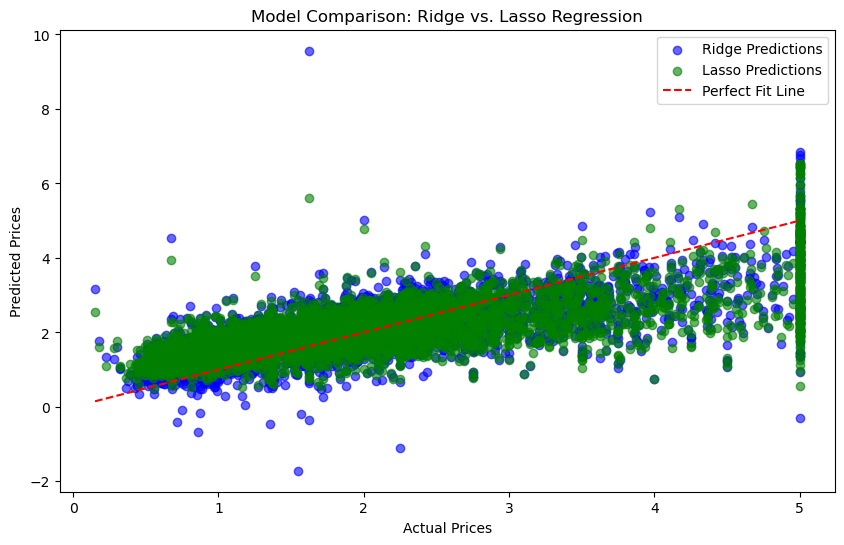

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, color='blue', alpha=0.6, label='Ridge Predictions')
plt.scatter(y_test, lasso_pred, color='green', alpha=0.6, label='Lasso Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Comparison: Ridge vs. Lasso Regression')
plt.legend()
plt.show()